C:\Users\Moo\AppData\Local\Temp\ipykernel_4728\2382790431.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ownerunitsaffordabletoaveragetechworker'], label='tech worker', hist=False)
C:\Users\Moo\AppData\Local\Temp\ipykernel_4728\2382790431.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750

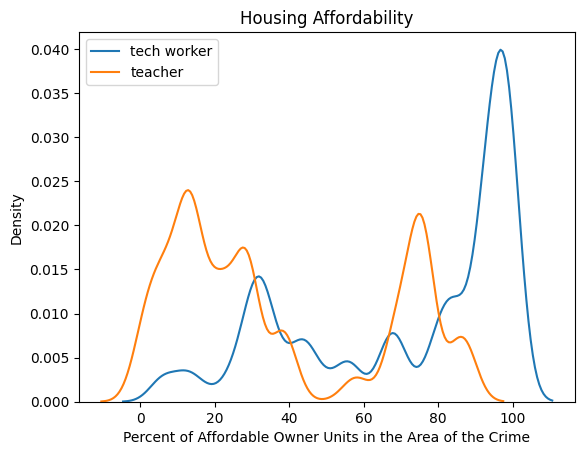

In [107]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('crime-housing-austin-2015.csv')

# Change percentages to floats so that they can be graphed
df['Ownerunitsaffordabletoaverageteacher'] = df['Ownerunitsaffordabletoaverageteacher'].str.replace('%', '').astype('float')
df['Ownerunitsaffordabletoaveragetechworker'] = df['Ownerunitsaffordabletoaveragetechworker'].str.replace('%', '').astype('float')

# Drop N/A values in dataset for the demographics we're interested in
df.dropna(subset=['Ownerunitsaffordabletoaveragetechworker', 'Ownerunitsaffordabletoaverageteacher'])

# Look at the distribution for housing affordability
sns.distplot(df['Ownerunitsaffordabletoaveragetechworker'], label='tech worker', hist=False)
sns.distplot(df['Ownerunitsaffordabletoaverageteacher'], label='teacher', hist=False)
plt.xlabel('Percent of Affordable Owner Units in the Area of the Crime')
plt.ylabel('Density')
plt.title('Housing Affordability')
plt.legend()
plt.show()

### Interesting Observations:

Most crimes are reported in places where the average tech worker can afford to own a house/unit. That's not terribly surprising, because the average tech worker can probably afford to own a house/unit in most places.

It's strange that there is a spike in places where less than 40% of average tech workers can afford to buy a house.

There are a fair amount of crimes reported in places where less than 40% of teachers can afford to buy a house. 

There are relatively few crimes recorded for places where only about half of tech workers and only about half of teachers can afford to buy a house.

There is a spike in crimes recorded for places where about 70% of teachers can afford to buy a house.

In general, it looks like there are more crimes in more affordable (cheaper) housing areas.

In [108]:
# Create a column for how much time passes between a crime being reported and a crime being cleared
df['Clearance_Time'] = pd.to_datetime(df['Clearance_Date'], format='%d-%b-%y') - pd.to_datetime(df['Report_Date'], format='%d-%b-%y')
df['Clearance_Time'] = df['Clearance_Time'].dt.days
df = df.dropna(subset=['Clearance_Time', 'Clearance_Status'])

# Make a table for each demographic
# Areas where less than half of tech workers can afford to rent a place
lowAffordability = df[df['Ownerunitsaffordabletoaveragetechworker'] < 50]
# Areas where more than half of teachers can afford to rent a place
highAffordability = df[df['Ownerunitsaffordabletoaverageteacher'] > 50]

totalCrimes = len(lowAffordability) + len(highAffordability)
lowAffordabilityCrimesPercent = len(lowAffordability) / totalCrimes
highAffordabilityCrimesPercent = len(highAffordability) / totalCrimes
display(f"Percent of low affordability crimes: {lowAffordabilityCrimesPercent}")
display(f"Percent of high affordability crimes: {highAffordabilityCrimesPercent}")
display(f"There are {highAffordabilityCrimesPercent - lowAffordabilityCrimesPercent} % more crimes recorded in our high-affordability housing areas than in our low-affordability housing areas")

'Percent of low affordability crimes: 0.46151726671565024'

'Percent of high affordability crimes: 0.5384827332843497'

'There are 0.07696546656869946 % more crimes recorded in our high-affordability housing areas than in our low-affordability housing areas'

It looks like there isn't a significant difference in the quantity of crimes recorded for very expensive areas vs very cheap areas. That's somewhat surprising.

## Is there a difference between low-affordability housing areas and high-affordability housing areas in the time it takes for a crime in those areas to be cleared?

'Low Affordability areas:'

'mean clearance time when cleared by arrest: 15.661265432098766'

'percent of crimes cleared by arrest: 0.12895522388059702'

'mean clearance time when cleared by exception: 40.950980392156865'

'percent of crimes cleared by exception: 0.020298507462686566'

'mean clearance time when not cleared: 13.723508771929824'

'percent of crimes not cleared: 0.8507462686567164'

'High Affordability areas:'

'mean clearance time when cleared by arrest: 18.88083164300203'

'percent of crimes cleared by arrest: 0.16817329012450963'

'mean clearance time when cleared by exception: 37.57983193277311'

'percent of crimes cleared by exception: 0.030445164591506056'

'mean clearance time when not cleared: 20.987017133127594'

'percent of crimes not cleared: 0.8013815452839843'

C:\Users\Moo\AppData\Local\Temp\ipykernel_4728\2860242768.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=lowAffordabilityArrest['Clearance_Time'], label='low', hist=False)
C:\Users\Moo\AppData\Local\Temp\ipykernel_4728\2860242768.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

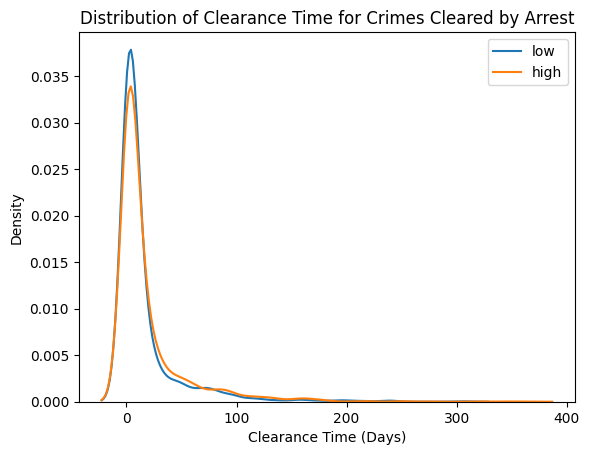

C:\Users\Moo\AppData\Local\Temp\ipykernel_4728\2860242768.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=lowAffordabilityException['Clearance_Time'], label='low', hist=False)
C:\Users\Moo\AppData\Local\Temp\ipykernel_4728\2860242768.py:38: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


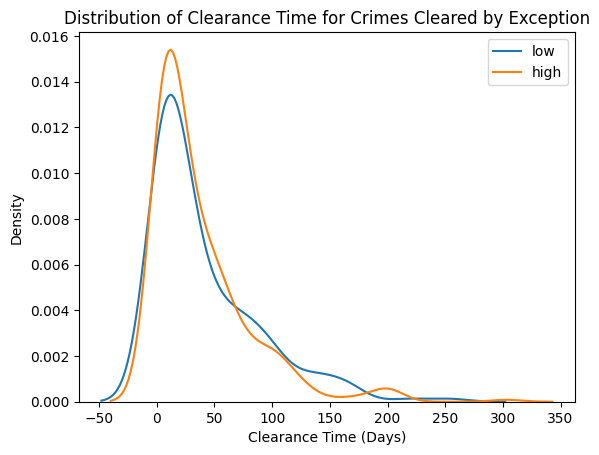

C:\Users\Moo\AppData\Local\Temp\ipykernel_4728\2860242768.py:45: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=lowAffordabilityNot['Clearance_Time'], label='low', hist=False)
C:\Users\Moo\AppData\Local\Temp\ipykernel_4728\2860242768.py:46: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

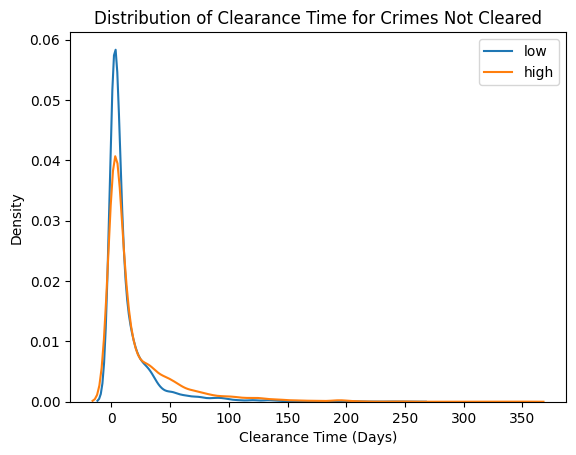

In [109]:
# Make a table for each clearance status in low affordability areas
lowAffordabilityArrest = lowAffordability[lowAffordability['Clearance_Status'] == 'C']
lowAffordabilityException = lowAffordability[lowAffordability['Clearance_Status'] == 'O']
lowAffordabilityNot = lowAffordability[lowAffordability['Clearance_Status'] == 'N']

# Make a table for each clearance status in high affordability areas
highAffordabilityArrest = highAffordability[highAffordability['Clearance_Status'] == 'C']
highAffordabilityException = highAffordability[highAffordability['Clearance_Status'] == 'O']
highAffordabilityNot = highAffordability[highAffordability['Clearance_Status'] == 'N']

# Take the mean of each clearance time by type, and housing affordability
display("Low Affordability areas:")
display(f"mean clearance time when cleared by arrest: {lowAffordabilityArrest['Clearance_Time'].mean()}")
display(f"percent of crimes cleared by arrest: {len(lowAffordabilityArrest) / len(lowAffordability)}")
display(f"mean clearance time when cleared by exception: {lowAffordabilityException['Clearance_Time'].mean()}")
display(f"percent of crimes cleared by exception: {len(lowAffordabilityException) / len(lowAffordability)}")
display(f"mean clearance time when not cleared: {lowAffordabilityNot['Clearance_Time'].mean()}")
display(f"percent of crimes not cleared: {len(lowAffordabilityNot) / len(lowAffordability)}")

display("High Affordability areas:")
display(f"mean clearance time when cleared by arrest: {highAffordabilityArrest['Clearance_Time'].mean()}")
display(f"percent of crimes cleared by arrest: {len(highAffordabilityArrest) / len(highAffordability)}")
display(f"mean clearance time when cleared by exception: {highAffordabilityException['Clearance_Time'].mean()}")
display(f"percent of crimes cleared by exception: {len(highAffordabilityException) / len(highAffordability)}")
display(f"mean clearance time when not cleared: {highAffordabilityNot['Clearance_Time'].mean()}")
display(f"percent of crimes not cleared: {len(highAffordabilityNot) / len(highAffordability)}")

# Compare the clearance time of each kind of status between low and high affordability housing areas
sns.distplot(x=lowAffordabilityArrest['Clearance_Time'], label='low', hist=False)
sns.distplot(x=highAffordabilityArrest['Clearance_Time'], label='high', hist=False)
plt.xlabel('Clearance Time (Days)')
plt.ylabel('Density')
plt.title('Distribution of Clearance Time for Crimes Cleared by Arrest')
plt.legend()
plt.show()

sns.distplot(x=lowAffordabilityException['Clearance_Time'], label='low', hist=False)
sns.distplot(x=highAffordabilityException['Clearance_Time'], label='high', hist=False)
plt.xlabel('Clearance Time (Days)')
plt.ylabel('Density')
plt.title('Distribution of Clearance Time for Crimes Cleared by Exception')
plt.legend()
plt.show()

sns.distplot(x=lowAffordabilityNot['Clearance_Time'], label='low', hist=False)
sns.distplot(x=highAffordabilityNot['Clearance_Time'], label='high', hist=False)
plt.xlabel('Clearance Time (Days)')
plt.ylabel('Density')
plt.title('Distribution of Clearance Time for Crimes Not Cleared')
plt.legend()
plt.show()

It seems that low-affordability housing areas (expensive housing) has lower clearance time than high-affordability housing areas (cheap housing). This could be because crimes being prosecuted in more expensive areas are given a higher priority, or that police departments in those areas have better funding. Let's run a t-test to see if this is statistically significant or not.

In [110]:
display(stats.ttest_ind(highAffordabilityArrest['Clearance_Time'], lowAffordabilityArrest['Clearance_Time']))
display(stats.ttest_ind(highAffordabilityException['Clearance_Time'], lowAffordabilityException['Clearance_Time']))
display(stats.ttest_ind(highAffordabilityNot['Clearance_Time'], lowAffordabilityNot['Clearance_Time']))

TtestResult(statistic=2.7001807023646793, pvalue=0.00696592185430845, df=3266.0)

TtestResult(statistic=-0.866768830527633, pvalue=0.3864405734950309, df=559.0)

TtestResult(statistic=16.53584749726664, pvalue=5.721939519906794e-61, df=17945.0)

Now compare clearance time overall for each housing group:

C:\Users\Moo\AppData\Local\Temp\ipykernel_4728\3813685092.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=lowAffordability['Clearance_Time'], label='low', hist=False)
C:\Users\Moo\AppData\Local\Temp\ipykernel_4728\3813685092.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

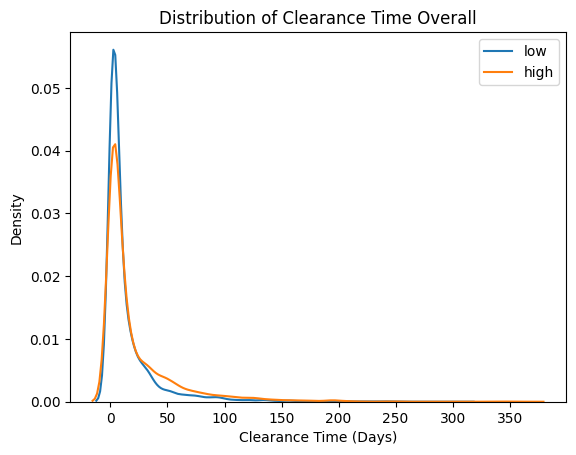

TtestResult(statistic=15.857604873419952, pvalue=2.5748335288749136e-56, df=21774.0)

In [111]:
sns.distplot(x=lowAffordability['Clearance_Time'], label='low', hist=False)
sns.distplot(x=highAffordability['Clearance_Time'], label='high', hist=False)
plt.xlabel('Clearance Time (Days)')
plt.ylabel('Density')
plt.title('Distribution of Clearance Time Overall')
plt.legend()
plt.show()

display(stats.ttest_ind(highAffordability['Clearance_Time'], lowAffordability['Clearance_Time']))


## Conclusions:

Vast majority of crimes are not cleared.
Minority of crimes are cleared by exception.

It takes less time for crimes to be cleared in areas with more expensive (low-affordability) housing.